In [1]:
from __future__ import print_function
import torch
import torch.backends.cudnn as cudnn
from PIL import Image
from torchvision.transforms import ToTensor
import numpy as np
import pickle
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn as nn
import SRCNN.model
import FSRCNN.model
import matplotlib.ticker as ticker

# SRCNN Experiment on Filter Number (Base Filter Size:9-1-5)

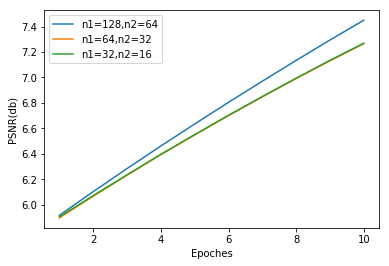

In [2]:
epochList = [i for i in range(1,11,1)]
with open("SRCNN/batch10_915_128_64/psnrList.pkl" , 'rb') as f:
    SRCNN_batch10_915_128_64 = pickle.load(f)
with open("SRCNN/batch10_915_64_32/psnrList.pkl" , 'rb') as f:
    SRCNN_batch10_915_64_32 = pickle.load(f)
with open("SRCNN/batch10_915_32_16/psnrList.pkl" , 'rb') as f:
    SRCNN_batch10_915_32_16 = pickle.load(f)
plt.figure('Draw')
plt.xlabel('Epoches')
plt.ylabel('PSNR(db)')
plt.plot(epochList , SRCNN_batch10_915_128_64 , label='n1=128,n2=64')
plt.plot(epochList , SRCNN_batch10_915_64_32 , label='n1=64,n2=32')
plt.plot(epochList , SRCNN_batch10_915_32_16 , label='n1=32,n2=16')
plt.legend()
plt.savefig("charts/SRCNN_filter_number")
plt.show()
plt.close()

# SRCNN Experiment on Filter Size

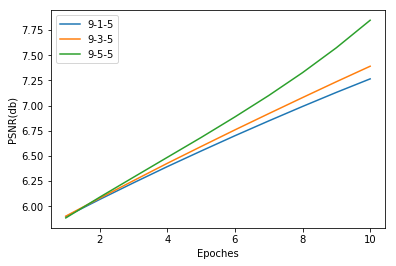

In [3]:
epochList = [i for i in range(1,11,1)]
with open("SRCNN/batch10_915_64_32/psnrList.pkl" , 'rb') as f:
    SRCNN_batch10_915_64_32 = pickle.load(f)
with open("SRCNN/batch10_935_64_32/psnrList.pkl" , 'rb') as f:
    SRCNN_batch10_935_64_32 = pickle.load(f)
with open("SRCNN/batch10_955_64_32/psnrList.pkl" , 'rb') as f:
    SRCNN_batch10_955_64_32 = pickle.load(f)
plt.figure('Draw')
plt.xlabel('Epoches')
plt.ylabel('PSNR(db)')
plt.plot(epochList , SRCNN_batch10_915_64_32 , label='9-1-5')
plt.plot(epochList , SRCNN_batch10_935_64_32 , label='9-3-5')
plt.plot(epochList , SRCNN_batch10_955_64_32 , label='9-5-5')
plt.legend()
plt.savefig("charts/SRCNN_filter_size")
plt.show()
plt.close()

# FSRCNN Experiment: fix d=56 , s=16 and m={2,3,4}

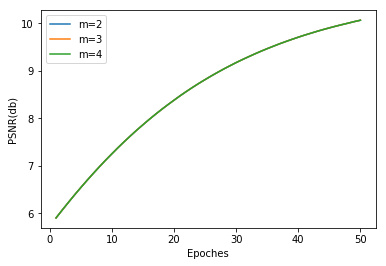

In [4]:
epochList = [i for i in range(1,51,1)]
with open("FSRCNN/batch50_56_16_2/psnrList.pkl" , 'rb') as f:
    FSRCNN_batch50_56_16_2 = pickle.load(f)
with open("FSRCNN/batch50_56_16_3/psnrList.pkl" , 'rb') as f:
    FSRCNN_batch50_56_16_3 = pickle.load(f)
with open("FSRCNN/batch50_56_16_4/psnrList.pkl" , 'rb') as f:
    FSRCNN_batch50_56_16_4 = pickle.load(f)
plt.figure('Draw')
plt.xlabel('Epoches')
plt.ylabel('PSNR(db)')
plt.plot(epochList , FSRCNN_batch50_56_16_2 , label='m=2')
plt.plot(epochList , FSRCNN_batch50_56_16_3 , label='m=3')
plt.plot(epochList , FSRCNN_batch50_56_16_4 , label='m=4')
plt.legend()
plt.savefig("charts/SRCNN_m234")
plt.show()
plt.close()

# FSRCNN Experiment: fix m=4 , d,s={56-16 , 48-16 , 56-12 , 48-12}

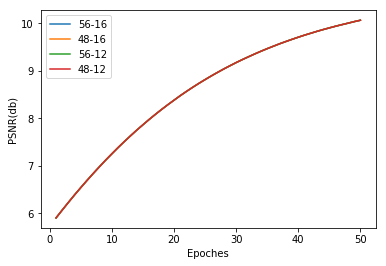

In [5]:
epochList = [i for i in range(1,51,1)]
with open("FSRCNN/batch50_56_16_4/psnrList.pkl" , 'rb') as f:
    FSRCNN_batch50_56_16_4 = pickle.load(f)
with open("FSRCNN/batch50_48_16_4/psnrList.pkl" , 'rb') as f:
    FSRCNN_batch50_48_16_4 = pickle.load(f)
with open("FSRCNN/batch50_56_12_4/psnrList.pkl" , 'rb') as f:
    FSRCNN_batch50_56_12_4 = pickle.load(f)
with open("FSRCNN/batch50_48_12_4/psnrList.pkl" , 'rb') as f:
    FSRCNN_batch50_48_12_4 = pickle.load(f)
plt.figure('Draw')
plt.xlabel('Epoches')
plt.ylabel('PSNR(db)')
plt.plot(epochList , FSRCNN_batch50_56_16_4 , label='56-16')
plt.plot(epochList , FSRCNN_batch50_48_16_4 , label='48-16')
plt.plot(epochList , FSRCNN_batch50_56_12_4 , label='56-12')
plt.plot(epochList , FSRCNN_batch50_48_12_4 , label='48-12')
plt.legend()
plt.savefig("charts/SRCNN_m4")
plt.show()
plt.close()

# Compare: SRCNN vs. FSRCNN

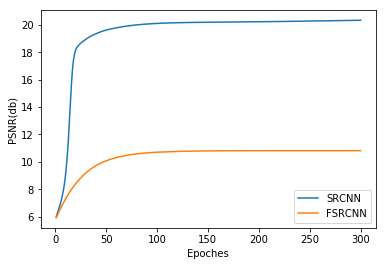

In [6]:
epochList = [i for i in range(1,301,1)]
SRCNN_Path_batch300 = 'SRCNN/batch300/'
with open(SRCNN_Path_batch300+'psnrList.pkl', 'rb') as f:
    SRCNN_psnrList = pickle.load(f)
FSRCNN_Path = 'FSRCNN/batch300/'
with open(FSRCNN_Path+'psnrList.pkl', 'rb') as f:
    FSRCNN_psnrList = pickle.load(f)

plt.figure('Draw')
plt.xlabel('Epoches')
plt.ylabel('PSNR(db)')
plt.plot(epochList , SRCNN_psnrList , label='SRCNN')
plt.plot(epochList , FSRCNN_psnrList , label='FSRCNN')
plt.legend()
plt.savefig("charts/300Epochs.png")
plt.show()
plt.close() 

In [16]:
print("PNSR for the best SCRNN Model :" , max(SRCNN_psnrList))
print("PNSR for the best FSCRNN Model :" , max(FSRCNN_psnrList))

PNSR for the best SCRNN Model : 20.33153503664575
PNSR for the best FSCRNN Model : 10.811984511922754


# SR: SRCNN Model

In [7]:
# Get the best model
max_model_SRCNN = SRCNN_Path_batch300 + 'model_' + str(SRCNN_psnrList.index(max(SRCNN_psnrList)) + 1) + '.pth'
max_model_SRCNN

'SRCNN/batch300/model_300.pth'

In [8]:
model = SRCNN.model.SRCNN(1,64,3)
state_dict=torch.load(max_model_SRCNN)
model.load_state_dict(state_dict)
model.eval()

SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (relu1): ReLU()
  (conv2): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

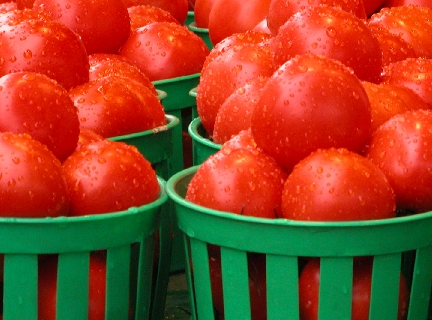

In [9]:
image = Image.open('./data/train/tt25.png')
image

In [10]:
image = image.convert('YCbCr')
y, cb, cr = image.split()

data = Variable(ToTensor()(y)).view(1, -1, y.size[1], y.size[0])

out = model(data)
out_img_y = out.data[0].numpy()
out_img_y *= 255.0
out_img_y = out_img_y.clip(0, 255)
out_img_y = Image.fromarray(np.uint8(out_img_y[0]), mode='L')

out_img_cb = cb.resize(out_img_y.size, Image.BICUBIC)
out_img_cr = cr.resize(out_img_y.size, Image.BICUBIC)
out_img = Image.merge('YCbCr', [out_img_y, out_img_cb, out_img_cr]).convert('RGB')
out_img.save('./sr_result/srcnn_sr.png')

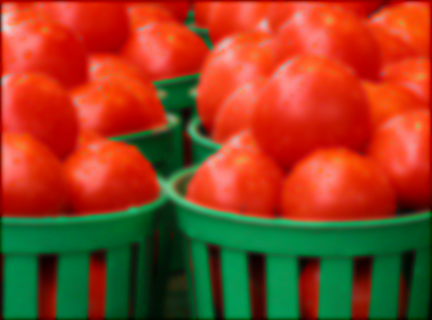

In [11]:
out_img

# SR: FSRCNN Model

In [12]:
# Get the best model
FSRCNN_Path_batch300 = 'FSRCNN/batch300/'
max_model_FSRCNN = FSRCNN_Path_batch300 + 'model_' + str(SRCNN_psnrList.index(max(SRCNN_psnrList)) + 1) + '.pth'
max_model_FSRCNN

'FSRCNN/batch300/model_300.pth'

In [13]:
model = FSRCNN.model.FSRCNN(1 , 56 , 12 , 4 , 3)
state_dict=torch.load(max_model_FSRCNN)
model.load_state_dict(state_dict)
model.eval()

FSRCNN(
  (conv1): Conv2d(1, 56, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (prelu1): PReLU(num_parameters=1)
  (conv2): Conv2d(56, 12, kernel_size=(1, 1), stride=(1, 1))
  (prelu2): PReLU(num_parameters=1)
  (conv3): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (prelu3): PReLU(num_parameters=1)
  (conv4): Conv2d(12, 56, kernel_size=(1, 1), stride=(1, 1))
  (prelu4): PReLU(num_parameters=1)
  (layering): Sequential(
    (0): Sequential(
      (0): Conv2d(56, 12, kernel_size=(1, 1), stride=(1, 1))
      (1): PReLU(num_parameters=1)
    )
    (1): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): PReLU(num_parameters=1)
    (6): Sequential(
      (0): Conv2d(12, 56, kernel_size=(1, 1), stride=(1, 1))
      (1)

In [14]:
image = Image.open('./data/train/tt25.png')
image = image.convert('YCbCr')
y, cb, cr = image.split()

data = Variable(ToTensor()(y)).view(1, -1, y.size[1], y.size[0])

out = model(data)
out_img_y = out.data[0].numpy()
out_img_y *= 255.0
out_img_y = out_img_y.clip(0, 255)
out_img_y = Image.fromarray(np.uint8(out_img_y[0]), mode='L')

out_img_cb = cb.resize(out_img_y.size, Image.BICUBIC)
out_img_cr = cr.resize(out_img_y.size, Image.BICUBIC)
out_img = Image.merge('YCbCr', [out_img_y, out_img_cb, out_img_cr]).convert('RGB')
out_img.save('./sr_result/fsrcnn_sr.png')

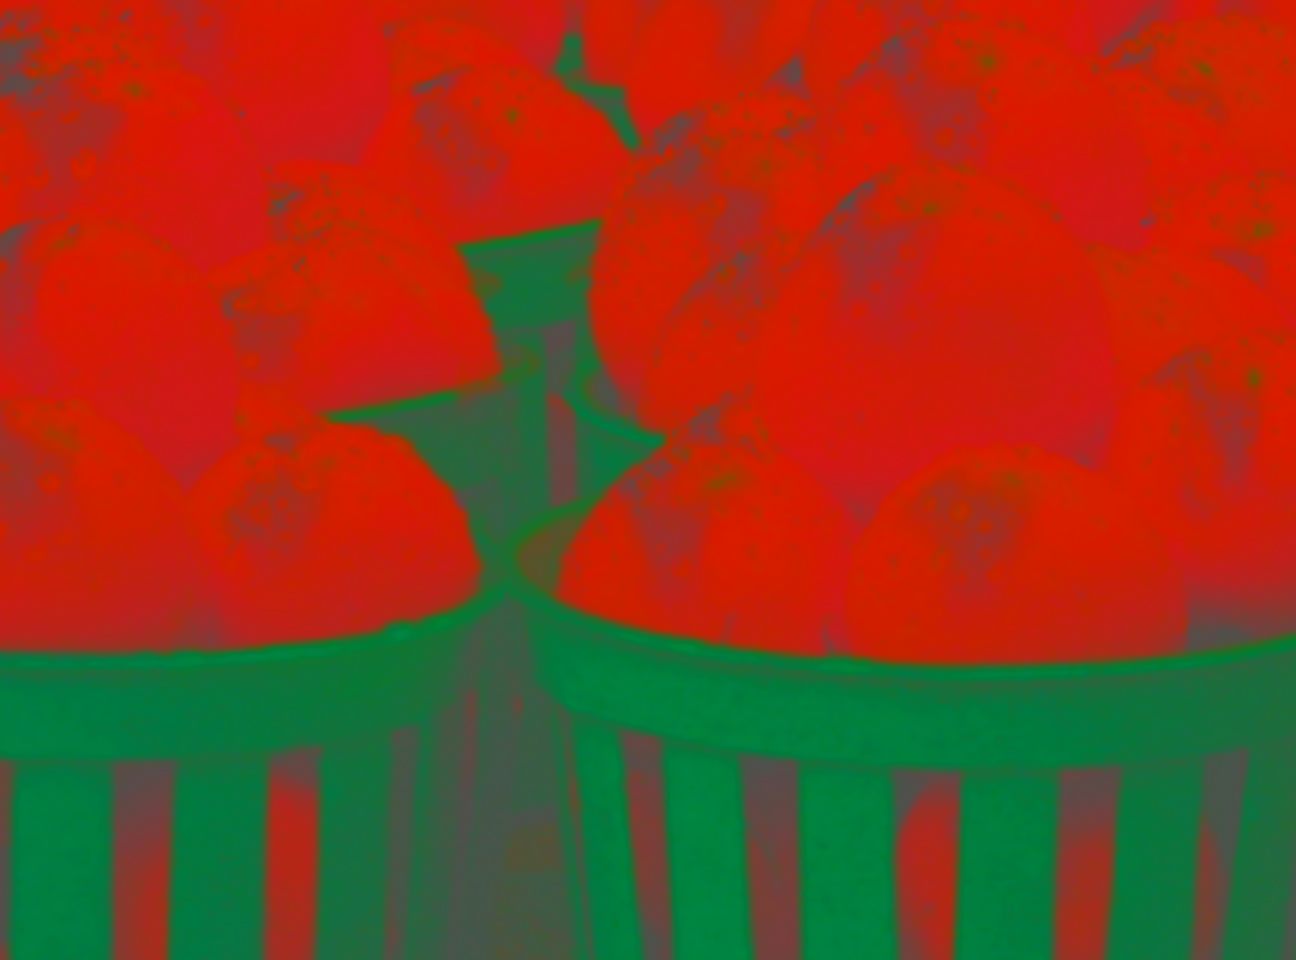

In [15]:
out_img